In [1]:
#Load standard libraries
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load data
df = pd.read_csv('./input/train.csv')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


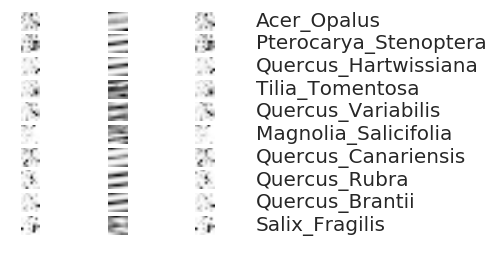

In [3]:
#Plot features of N = 5 samples
fig = plt.figure()
N = 10
for k in range(N):
    margin0 = df.filter(regex = "margin*").loc[k].reshape((8,8))
    imgplot1 = fig.add_subplot(N,4,4*k+1)
    imgplot1.imshow(margin0)
    imgplot1.axis('off')
    shape0 = df.filter(regex = "shape*").loc[k].reshape((8,8))
    imgplot1 = fig.add_subplot(N,4,4*k+2)
    imgplot1.imshow(shape0)
    imgplot1.axis('off')
    texture0 = df.filter(regex = "margin*").loc[k].reshape((8,8))
    imgplot1 = fig.add_subplot(N,4,4*k+3)
    imgplot1.imshow(texture0)
    imgplot1.axis('off')
    imgplot1 = fig.add_subplot(N,4,4*k+4)
    imgplot1.text(0, 0.5, df['species'].loc[k],
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=20)
    imgplot1.axis('off')

In [4]:
#How many samples are there of each species?
train_labels = df['species'].values
class_count = {}
for sample1 in train_labels:
    if sample1 not in class_count:
        class_count[sample1] = 1
    else:
        class_count[sample1] += 1


print(str(len(class_count)) + " classes " + str(len(train_labels)) + " samples.")
#print("-----------------------------")
        
#for label,count in class_count.items():
#    print(label + ": " + str(count))

99 classes 990 samples.


In [5]:
#Load Keras
from keras.layers import Input, Dense, Merge, Dropout
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical

#Load scikit learn dependencies
from sklearn.preprocessing import LabelEncoder

ImportError: No module named keras.layers

In [ ]:
#Define network
M1 = 300
margin_layer = Sequential()
margin_layer.add(Dense(M1,input_dim=64,init='uniform',activation='relu'))
margin_layer.add(Dropout(0.2))
margin_layer.add(Dense(M1,init='uniform',activation='relu'))

shape_layer = Sequential()
shape_layer.add(Dense(M1,input_dim=64,init='uniform',activation='relu'))
shape_layer.add(Dropout(0.2))
shape_layer.add(Dense(M1,init='uniform',activation='relu'))

texture_layer = Sequential()
texture_layer.add(Dense(M1,input_dim=64,init='uniform',activation='relu'))
texture_layer.add(Dropout(0.2))
texture_layer.add(Dense(M1,init='uniform',activation='relu'))

merge_layer = Sequential()
merge_layer.add(Merge([margin_layer,shape_layer,texture_layer],mode="concat",name='merge_layer'))
merge_layer.add(Dense(300,activation="sigmoid"))
merge_layer.add(Dropout(0.3))
merge_layer.add(Dense(99,activation="softmax",name='output_layer'))

In [ ]:
#Load train data
margin_train = df.filter(regex="margin*").values
shape_train = df.filter(regex="shape*").values
texture_train = df.filter(regex="texture*").values
labels_train = df['species'].values
labels_train = LabelEncoder().fit(labels_train).transform(labels_train)
labels_train = to_categorical(labels_train)

In [ ]:
#Train network
merge_layer.compile(optimizer='rmsprop', loss='binary_crossentropy')
merge_layer.fit([margin_train, shape_train, texture_train], labels_train, nb_epoch=100, batch_size=100)